In [1]:
%load_ext jupyter_tikz

In [2]:
from draw_tree import draw_tree, generate_tex, generate_pdf, generate_png, efg_to_ef

from IPython import get_ipython

In [3]:
efg_to_ef("../games/efg/one_card_poker.efg")

'../games/efg/one_card_poker.ef'

In [4]:
efg_to_ef("../games/efg/trust_game.efg")

'../games/efg/trust_game.ef'

In [5]:
efg_to_ef("../games/efg/2smp.efg")

'../games/efg/2smp.ef'

In [6]:
efg_to_ef("../games/efg/2s2x2x2.efg")

'../games/efg/2s2x2x2.ef'

In [7]:
efg_to_ef("../games/efg/cent2.efg")

'../games/efg/cent2.ef'

In [8]:
example_games = [
    "efg/one_card_poker",
    "efg/trust_game",
    "efg/2smp",
    "efg/2s2x2x2",
    "efg/cent2",
    "cent2",
    "2smp",
    "one_card_poker",
    "2s2x2x2",
    "crossing",
    "Figure1",
    "MyTree1",
    "oldex",
    "x1"
]
tikz_codes = {
    game: draw_tree(f"../games/{game}.ef", show_grid=False, scale_factor=1)
    for game in example_games
}

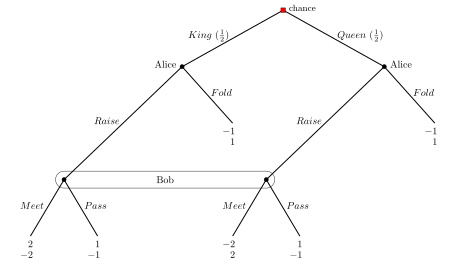

In [9]:
get_ipython().run_cell_magic("tikz", "", tikz_codes["one_card_poker"])

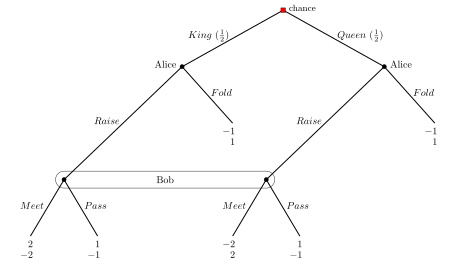

In [10]:
get_ipython().run_cell_magic("tikz", "", tikz_codes["efg/one_card_poker"])

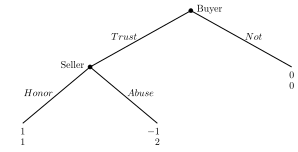

In [11]:
get_ipython().run_cell_magic("tikz", "", tikz_codes["efg/trust_game"])

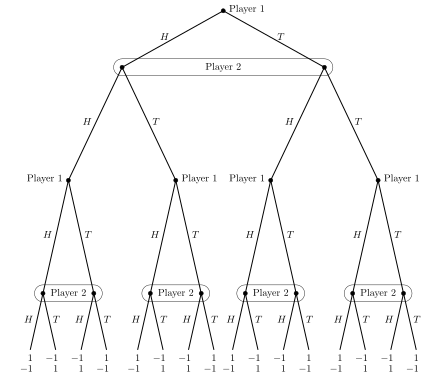

In [12]:
get_ipython().run_cell_magic("tikz", "", tikz_codes["2smp"])

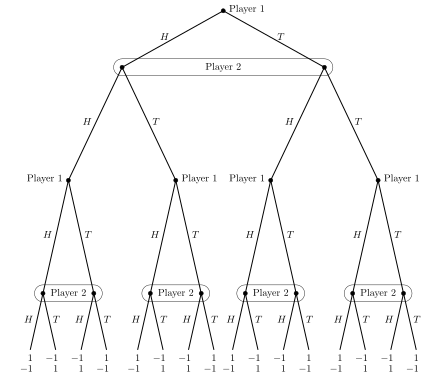

In [13]:
get_ipython().run_cell_magic("tikz", "", tikz_codes["efg/2smp"])

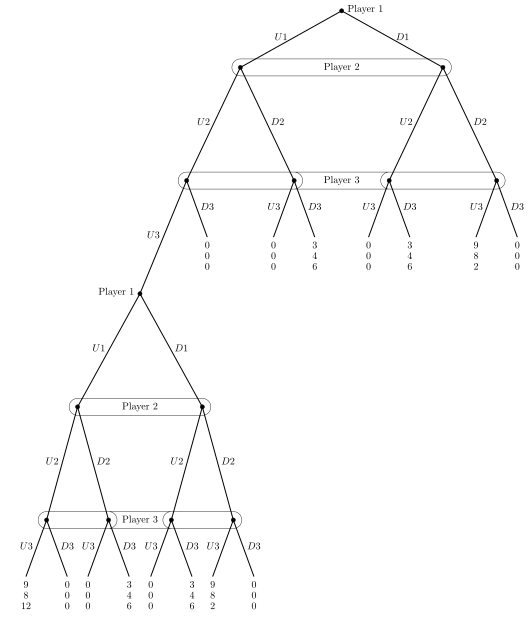

In [14]:
get_ipython().run_cell_magic("tikz", "", tikz_codes["2s2x2x2"])

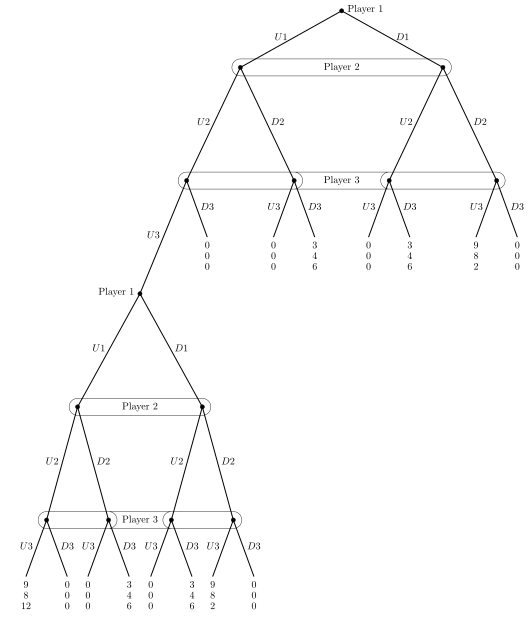

In [15]:
get_ipython().run_cell_magic("tikz", "", tikz_codes["efg/2s2x2x2"])

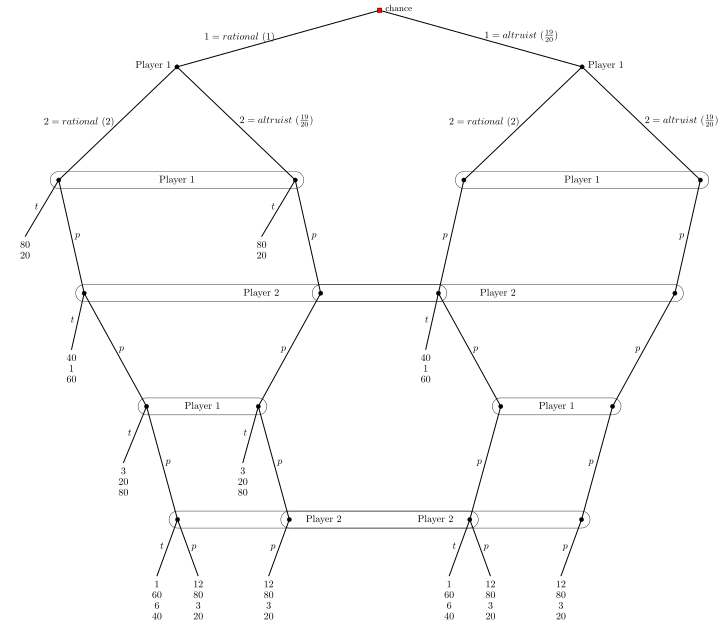

In [16]:
get_ipython().run_cell_magic("tikz", "", tikz_codes["cent2"])

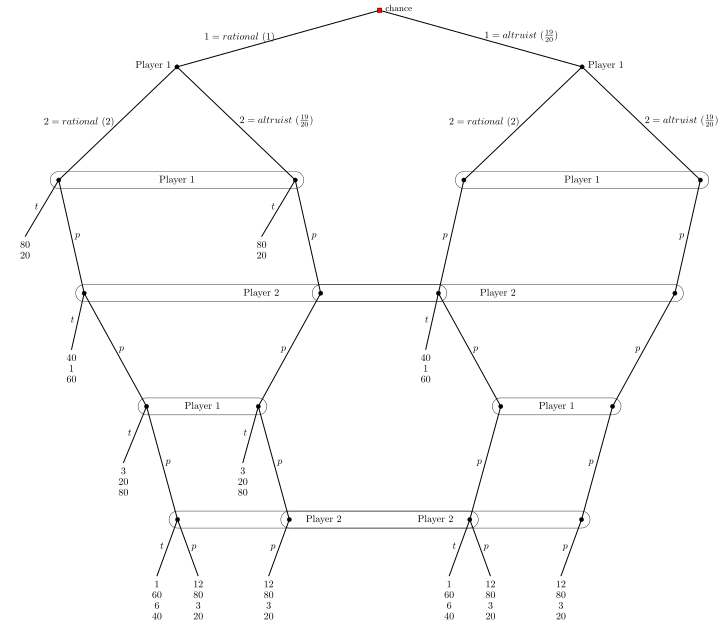

In [17]:
get_ipython().run_cell_magic("tikz", "", tikz_codes["efg/cent2"])

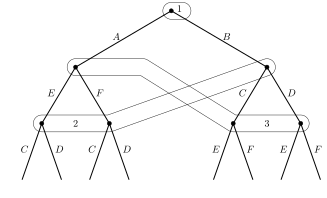

In [18]:
get_ipython().run_cell_magic("tikz", "", tikz_codes["crossing"])

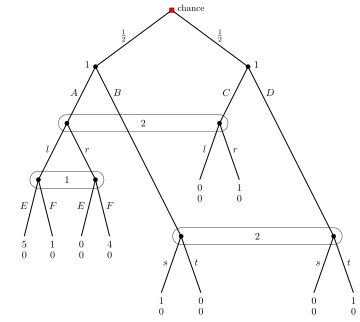

In [19]:
get_ipython().run_cell_magic("tikz", "", tikz_codes["Figure1"])

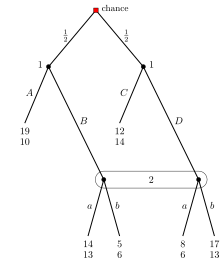

In [20]:
get_ipython().run_cell_magic("tikz", "", tikz_codes["MyTree1"])

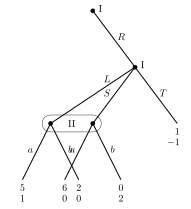

In [21]:
get_ipython().run_cell_magic("tikz", "", tikz_codes["oldex"])

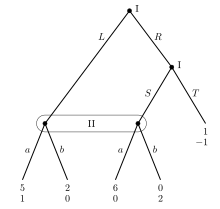

In [22]:
get_ipython().run_cell_magic("tikz", "", tikz_codes["x1"])

In [23]:
# generate_tex('../games/x1.ef')
# generate_pdf('../games/x1.ef')
# generate_png('../games/x1.ef')